In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize
from scipy.stats import norm

# Portfolio Construction

In [94]:
STOCK_NAMES = ['AAPL', 'CRM', 'AMZN', 'MSFT', 'NFLX', 'JPM']
ETF_NAMES = ['SOXX', 'XBI']
ASSET_NAMES = STOCK_NAMES + ETF_NAMES
NUM_ASSETS = len(ASSET_NAMES)

In [95]:
stocks_path = './archive/stocks/'
etfs_path = './archive/etfs/'
asset_dfs = []

for stock_name in STOCK_NAMES:
    stock_df = pd.read_csv(stocks_path + stock_name + '.csv', index_col='Date')
    asset_dfs.append(stock_df)

for etf_name in ETF_NAMES:
    etf_df = pd.read_csv(etfs_path + etf_name + '.csv', index_col='Date')
    asset_dfs.append(etf_df)

asset_dfs[0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400
...,...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100


In [96]:
# Querying data for a 10 year period
for asset_df in asset_dfs:
    asset_df.query("Date >= '2010-04-01' and Date <= '2020-04-01'", inplace=True)
asset_dfs[0]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-04-01,33.915714,34.104286,33.250000,33.709999,29.261658,150786300
2010-04-05,33.568573,34.072857,33.538570,34.070000,29.574146,171126900
2010-04-06,34.028572,34.320000,33.857143,34.220001,29.704361,111754300
2010-04-07,34.221428,34.560001,34.094284,34.371429,29.835800,157125500
2010-04-08,34.348572,34.505714,34.005714,34.278572,29.755198,143247300
...,...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100


In [97]:
# Normalizing prices
for asset_df in asset_dfs:
    asset_df['Normed Return'] = asset_df['Adj Close']/asset_df.iloc[0]['Adj Close']
asset_dfs[0]

,Open,High,Low,Close,Adj Close,Volume,Normed Return
Date,,,,,,,
2010-04-01,33.915714,34.104286,33.250000,33.709999,29.261658,150786300,1.000000
2010-04-05,33.568573,34.072857,33.538570,34.070000,29.574146,171126900,1.010679
2010-04-06,34.028572,34.320000,33.857143,34.220001,29.704361,111754300,1.015129
2010-04-07,34.221428,34.560001,34.094284,34.371429,29.835800,157125500,1.019621
2010-04-08,34.348572,34.505714,34.005714,34.278572,29.755198,143247300,1.016866
...,...,...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800,8.832036
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200,8.466369
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100,8.707982


In [98]:
# Assuming equal allocation to each asset
allocation = 1.0/NUM_ASSETS
allocation

0.125

In [99]:
# Actual allocation
for asset_df in asset_dfs:
    asset_df['Allocation'] = asset_df['Normed Return']*allocation
asset_dfs[0]


,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation
Date,,,,,,,,
2010-04-01,33.915714,34.104286,33.250000,33.709999,29.261658,150786300,1.000000,0.125000
2010-04-05,33.568573,34.072857,33.538570,34.070000,29.574146,171126900,1.010679,0.126335
2010-04-06,34.028572,34.320000,33.857143,34.220001,29.704361,111754300,1.015129,0.126891
2010-04-07,34.221428,34.560001,34.094284,34.371429,29.835800,157125500,1.019621,0.127453
2010-04-08,34.348572,34.505714,34.005714,34.278572,29.755198,143247300,1.016866,0.127108
...,...,...,...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800,8.832036,1.104004
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200,8.466369,1.058296
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100,8.707982,1.088498


In [100]:
INVESTMENT_AMT = 1000000
# Calculating postion value of each asset
for asset_df in asset_dfs:
    asset_df['Position Values'] = asset_df['Allocation']*INVESTMENT_AMT
asset_dfs[0]

,Open,High,Low,Close,Adj Close,Volume,Normed Return,Allocation,Position Values
Date,,,,,,,,,
2010-04-01,33.915714,34.104286,33.250000,33.709999,29.261658,150786300,1.000000,0.125000,1.250000e+05
2010-04-05,33.568573,34.072857,33.538570,34.070000,29.574146,171126900,1.010679,0.126335,1.263349e+05
2010-04-06,34.028572,34.320000,33.857143,34.220001,29.704361,111754300,1.015129,0.126891,1.268911e+05
2010-04-07,34.221428,34.560001,34.094284,34.371429,29.835800,157125500,1.019621,0.127453,1.274526e+05
2010-04-08,34.348572,34.505714,34.005714,34.278572,29.755198,143247300,1.016866,0.127108,1.271083e+05
...,...,...,...,...,...,...,...,...,...
2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800,8.832036,1.104004,1.104004e+06
2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200,8.466369,1.058296,1.058296e+06
2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100,8.707982,1.088498,1.088498e+06


In [101]:
pos_val_cols = [asset_df[['Position Values']] for asset_df in asset_dfs]
pos_val_cols[0]

,Position Values
Date,
2010-04-01,1.250000e+05
2010-04-05,1.263349e+05
2010-04-06,1.268911e+05
2010-04-07,1.274526e+05
2010-04-08,1.271083e+05
...,...
2020-03-26,1.104004e+06
2020-03-27,1.058296e+06
2020-03-30,1.088498e+06


In [102]:
# Calculating total portfolio value
portfolio_val = pd.concat(pos_val_cols, axis=1, sort=True)
portfolio_val.columns = [asset_name + ' Pos' for asset_name in ASSET_NAMES]
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val

,AAPL Pos,CRM Pos,AMZN Pos,MSFT Pos,NFLX Pos,JPM Pos,SOXX Pos,XBI Pos,Total Pos
Date,,,,,,,,,
2010-04-01,1.250000e+05,1.250000e+05,1.250000e+05,125000.000000,1.250000e+05,125000.000000,125000.000000,125000.000000,1.000000e+06
2010-04-05,1.263349e+05,1.271677e+05,1.246965e+05,125471.532309,1.333167e+05,125442.655737,128593.080760,126323.422747,1.017347e+06
2010-04-06,1.268911e+05,1.304441e+05,1.285563e+05,125685.894394,1.389500e+05,126825.971880,127783.403079,126261.386925,1.031398e+06
2010-04-07,1.274526e+05,1.277138e+05,1.279019e+05,125814.443219,1.328833e+05,125387.333949,128264.157365,125620.346034,1.021038e+06
2010-04-08,1.271083e+05,1.289879e+05,1.336773e+05,128257.886920,1.363833e+05,126604.711874,126518.200072,126447.470016,1.033985e+06
...,...,...,...,...,...,...,...,...,...
2020-03-26,1.104004e+06,1.024159e+06,1.854459e+06,848559.096131,4.234883e+06,349107.761088,607266.184563,499882.607262,1.052232e+07
2020-03-27,1.058296e+06,9.663754e+05,1.801931e+06,813716.569115,4.166400e+06,324237.550128,577136.840752,485377.486393,1.019347e+07
2020-03-30,1.088498e+06,9.918586e+05,1.862482e+06,870953.941554,4.327867e+06,332669.942397,597223.098984,498604.596199,1.057016e+07


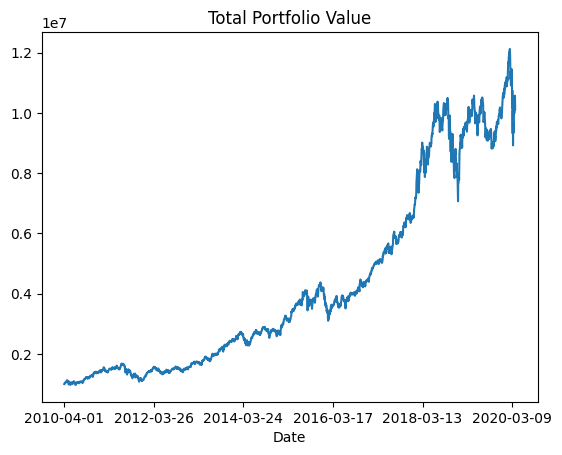

In [103]:
# Plotting total portfolio value
portfolio_val['Total Pos'].plot()
plt.title('Total Portfolio Value')
plt.show()

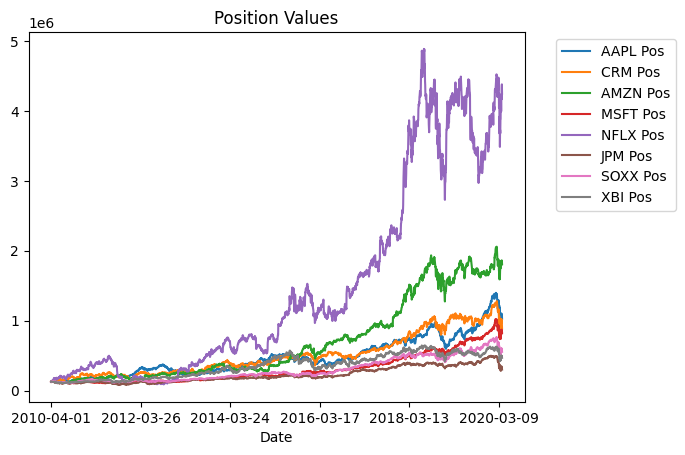

In [104]:
# Plotting position vlaue of each asset
portfolio_val.drop('Total Pos', axis=1).plot(kind='line')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Position Values')
plt.show()

In [105]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val

,AAPL Pos,CRM Pos,AMZN Pos,MSFT Pos,NFLX Pos,JPM Pos,SOXX Pos,XBI Pos,Total Pos,Daily Return
Date,,,,,,,,,,
2010-04-01,1.250000e+05,1.250000e+05,1.250000e+05,125000.000000,1.250000e+05,125000.000000,125000.000000,125000.000000,1.000000e+06,NaN
2010-04-05,1.263349e+05,1.271677e+05,1.246965e+05,125471.532309,1.333167e+05,125442.655737,128593.080760,126323.422747,1.017347e+06,0.017347
2010-04-06,1.268911e+05,1.304441e+05,1.285563e+05,125685.894394,1.389500e+05,126825.971880,127783.403079,126261.386925,1.031398e+06,0.013812
2010-04-07,1.274526e+05,1.277138e+05,1.279019e+05,125814.443219,1.328833e+05,125387.333949,128264.157365,125620.346034,1.021038e+06,-0.010045
2010-04-08,1.271083e+05,1.289879e+05,1.336773e+05,128257.886920,1.363833e+05,126604.711874,126518.200072,126447.470016,1.033985e+06,0.012680
...,...,...,...,...,...,...,...,...,...,...
2020-03-26,1.104004e+06,1.024159e+06,1.854459e+06,848559.096131,4.234883e+06,349107.761088,607266.184563,499882.607262,1.052232e+07,0.054349
2020-03-27,1.058296e+06,9.663754e+05,1.801931e+06,813716.569115,4.166400e+06,324237.550128,577136.840752,485377.486393,1.019347e+07,-0.031253
2020-03-30,1.088498e+06,9.918586e+05,1.862482e+06,870953.941554,4.327867e+06,332669.942397,597223.098984,498604.596199,1.057016e+07,0.036954


In [106]:
cum_ret = 100 * (portfolio_val['Total Pos'].iloc[-1] / portfolio_val['Total Pos'].iloc[0] - 1)
mean_ret = portfolio_val['Daily Return'].mean()
std_ret = portfolio_val['Daily Return'].std()
print("Cumulative Return: ", cum_ret, "%")
print("Mean Daily Return: ", mean_ret)
print("Standard Deviation in Daily Return: ", std_ret)

Cumulative Return:  912.1749122031696 %
Mean Daily Return:  0.001044501116615101
Standard Deviation in Daily Return:  0.015754147130719858


Sharpe ratio: A key metric in portfolio analysis, it is the ratio of a portfolio's expected excess return to its volatility. This quantity serves as a widely adopted industry standard for evaluating risk-adjusted returns.

Sharpe Ratio = (Mean portfolio return − Risk-free rate) / Standard deviation of portfolio return

In [107]:
RISK_FREE_RATE = 0.0
SR = (mean_ret - RISK_FREE_RATE) / std_ret
SR

0.06630007374873198

Annualized Sharpe Ratio = K-value * SR

K-values for various sampling rates:

Daily = sqrt(252)     [ As there are around 252 trading days per year ]

Weekly = sqrt(52)

Monthly = sqrt(12)

In [108]:
ASR = (252**0.5)*SR
ASR

1.0524810422663202

# Monte Carlo Simulation

Monte Carlo simulation is a computational technique that uses random sampling to model and analyze complex systems. In finance, it's commonly employed to assess the range of possible outcomes for an investment or portfolio. By running multiple simulations with randomly generated inputs, it provides insights into the potential future performance and associated risks. Monte Carlo simulations help decision-makers make informed choices by considering a spectrum of possible scenarios rather than relying on a single deterministic forecast.

In [109]:
close_cols = [asset_df[['Adj Close']] for asset_df in asset_dfs]
close_cols[0]

,Adj Close
Date,
2010-04-01,29.261658
2010-04-05,29.574146
2010-04-06,29.704361
2010-04-07,29.835800
2010-04-08,29.755198
...,...
2020-03-26,258.440002
2020-03-27,247.740005
2020-03-30,254.809998


In [110]:
close_val = pd.concat(close_cols, axis=1, sort=True)
close_val.columns = [asset_name + ' Close' for asset_name in ASSET_NAMES]
close_val

,AAPL Close,CRM Close,AMZN Close,MSFT Close,NFLX Close,JPM Close,SOXX Close,XBI Close
Date,,,,,,,,
2010-04-01,29.261658,18.885000,131.809998,22.996336,10.714286,35.132420,43.811100,19.562094
2010-04-05,29.574146,19.212500,131.490005,23.083084,11.427143,35.256832,45.070435,19.769205
2010-04-06,29.704361,19.707500,135.559998,23.122520,11.910000,35.645626,44.786652,19.759497
2010-04-07,29.835800,19.295000,134.869995,23.146170,11.390000,35.241283,44.955151,19.659176
2010-04-08,29.755198,19.487499,140.960007,23.595692,11.690000,35.583439,44.343212,19.788618
...,...,...,...,...,...,...,...,...
2020-03-26,258.440002,154.729996,1955.489990,156.110001,362.989990,98.120003,212.839996,78.230003
2020-03-27,247.740005,146.000000,1900.099976,149.699997,357.119995,91.129997,202.279999,75.959999
2020-03-30,254.809998,149.850006,1963.949951,160.229996,370.959991,93.500000,209.320007,78.029999


In [111]:
# Using log returns instead of arithmetic returns
log_ret = np.log(close_val/close_val.shift(1))
log_ret

,AAPL Close,CRM Close,AMZN Close,MSFT Close,NFLX Close,JPM Close,SOXX Close,XBI Close
Date,,,,,,,,
2010-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-05,0.010622,0.017193,-0.002431,0.003765,0.064414,0.003535,0.028339,0.010532
2010-04-06,0.004393,0.025438,0.030483,0.001707,0.041387,0.010967,-0.006316,-0.000491
2010-04-07,0.004415,-0.021153,-0.005103,0.001022,-0.044643,-0.011408,0.003755,-0.005090
2010-04-08,-0.002705,0.009927,0.044165,0.019235,0.025998,0.009662,-0.013706,0.006563
...,...,...,...,...,...,...,...,...
2020-03-26,0.051285,0.050841,0.036267,0.060673,0.058425,0.067342,0.065077,0.038970
2020-03-27,-0.042284,-0.058075,-0.028734,-0.041928,-0.016303,-0.073904,-0.050888,-0.029446
2020-03-30,0.028138,0.026028,0.033051,0.067977,0.038022,0.025674,0.034211,0.026886


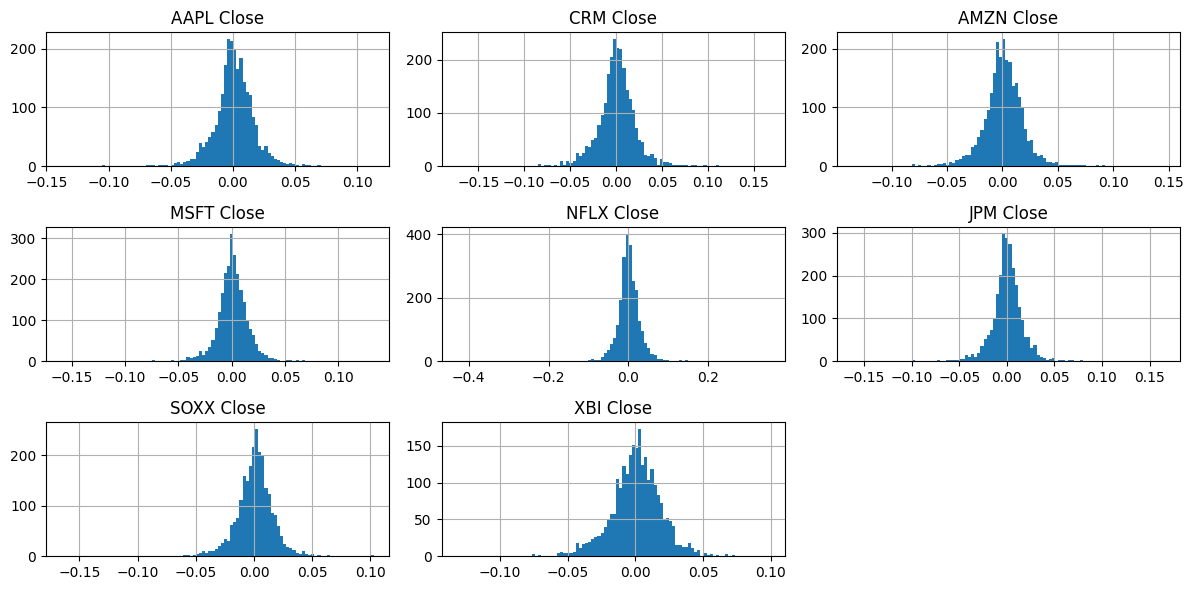

In [112]:
# Visualizing the distribution of log returns
log_ret.hist(bins=100,figsize=(12,6))
plt.tight_layout()

In [113]:
mean = log_ret.mean() * 252
mean

AAPL Close    0.211066
CRM Close     0.196226
AMZN Close    0.267548
MSFT Close    0.189152
NFLX Close    0.353000
JPM Close     0.087701
SOXX Close    0.148964
XBI Close     0.132199
dtype: float64

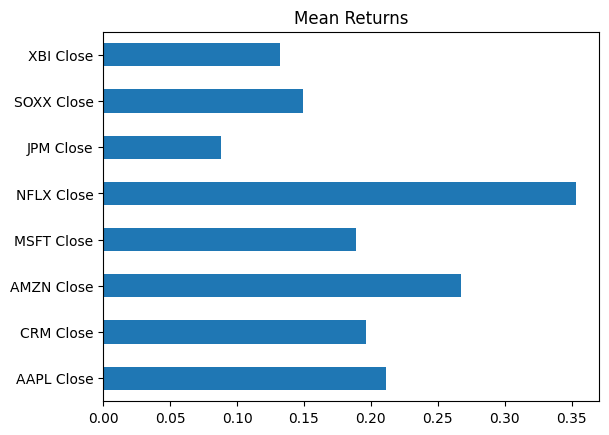

In [114]:
# Visualizing average returns of each asset
mean.plot.barh()
plt.title('Mean Returns')
plt.show()

In [115]:
variance = log_ret.var()*252
variance

AAPL Close    0.075745
CRM Close     0.123984
AMZN Close    0.098229
MSFT Close    0.062684
NFLX Close    0.270238
JPM Close     0.077043
SOXX Close    0.067909
XBI Close     0.094176
dtype: float64

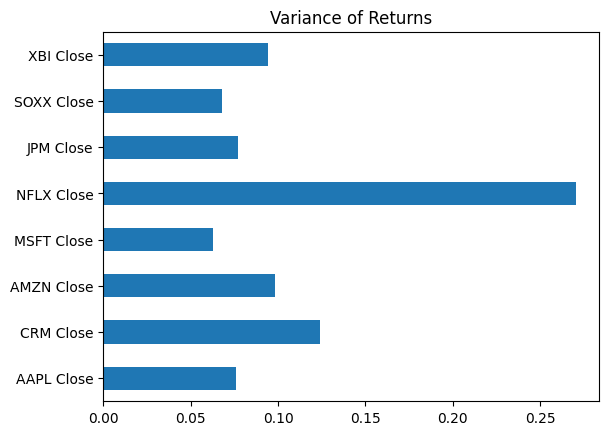

In [116]:
# Visualizing variance of returns of each asset
variance.plot.barh()
plt.title('Variance of Returns')
plt.show()

The variance-covariance matrix is a key element in mean-variance portfolio optimization, detailing how returns of different assets in a portfolio relate. In mean-variance optimization, the variance-covariance matrix, coupled with expected returns, guides the determination of the optimal asset allocation. This process aids in finding the asset mix that maximizes returns given a certain level of risk or minimizes risk for a desired level of returns. By assessing risk contributions and considering asset correlations, the matrix facilitates the evaluation of diversification benefits. Combining assets with low or negative correlations can potentially enhance the efficiency of the risk-return trade-off.

In [117]:
covariance = log_ret.cov()*252
covariance

,AAPL Close,CRM Close,AMZN Close,MSFT Close,NFLX Close,JPM Close,SOXX Close,XBI Close
AAPL Close,0.075745,0.040627,0.036745,0.036786,0.036556,0.034886,0.043924,0.037413
CRM Close,0.040627,0.123984,0.054692,0.045209,0.061263,0.043674,0.054202,0.053927
AMZN Close,0.036745,0.054692,0.098229,0.039971,0.065719,0.032768,0.041796,0.043919
MSFT Close,0.036786,0.045209,0.039971,0.062684,0.039470,0.038548,0.043417,0.036443
NFLX Close,0.036556,0.061263,0.065719,0.039470,0.270238,0.033024,0.047764,0.049777
JPM Close,0.034886,0.043674,0.032768,0.038548,0.033024,0.077043,0.046595,0.042809
SOXX Close,0.043924,0.054202,0.041796,0.043417,0.047764,0.046595,0.067909,0.048372
XBI Close,0.037413,0.053927,0.043919,0.036443,0.049777,0.042809,0.048372,0.094176


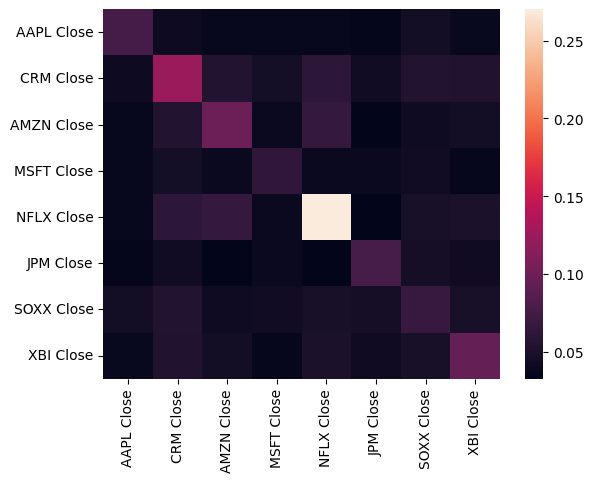

In [118]:
# Visualizing the heatmap of the covariance matrix
sns.heatmap(covariance)
plt.show()

In the heatmap, the diagonal signifies variance, and the other colored tiles depict covariances. A lower value (or a darker color) suggests lower similarity between stocks, thus assisting in risk management.

In [119]:
np.random.seed(42)
weights = np.array(np.random.random(NUM_ASSETS))
weights

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615])

In [120]:
weights = weights / np.sum(weights)
weights

array([0.09622888, 0.24426269, 0.18806787, 0.15381059, 0.04008516,
       0.04007896, 0.01492316, 0.22254269])

In [121]:
def compute_ret_vol_sr(weights):
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = (ret - RISK_FREE_RATE) / vol
    return ret, vol, sr

In [122]:
# Single run for a random allocation
exp_ret, exp_vol, sr = compute_ret_vol_sr(weights)
print("Expected Returns: ", exp_ret)
print("Expected Volatility: ", exp_vol)
print("Sharpe Ratio: ", sr)

Expected Returns:  0.19696000608286898
Expected Volatility:  0.23493154786941423
Sharpe Ratio:  0.838371891170395


In [123]:
SIMULATIONS = 10000

In [124]:
weights_arr = np.zeros((SIMULATIONS, NUM_ASSETS))
ret_arr = np.zeros(SIMULATIONS)
vol_arr = np.zeros(SIMULATIONS)
sharpe_arr = np.zeros(SIMULATIONS)

In [125]:
for i in range(SIMULATIONS):
    weights = np.array(np.random.random(NUM_ASSETS))
    weights = weights / np.sum(weights)
    weights_arr[i] = weights
    ret_arr[i], vol_arr[i], sharpe_arr[i] = compute_ret_vol_sr(weights)

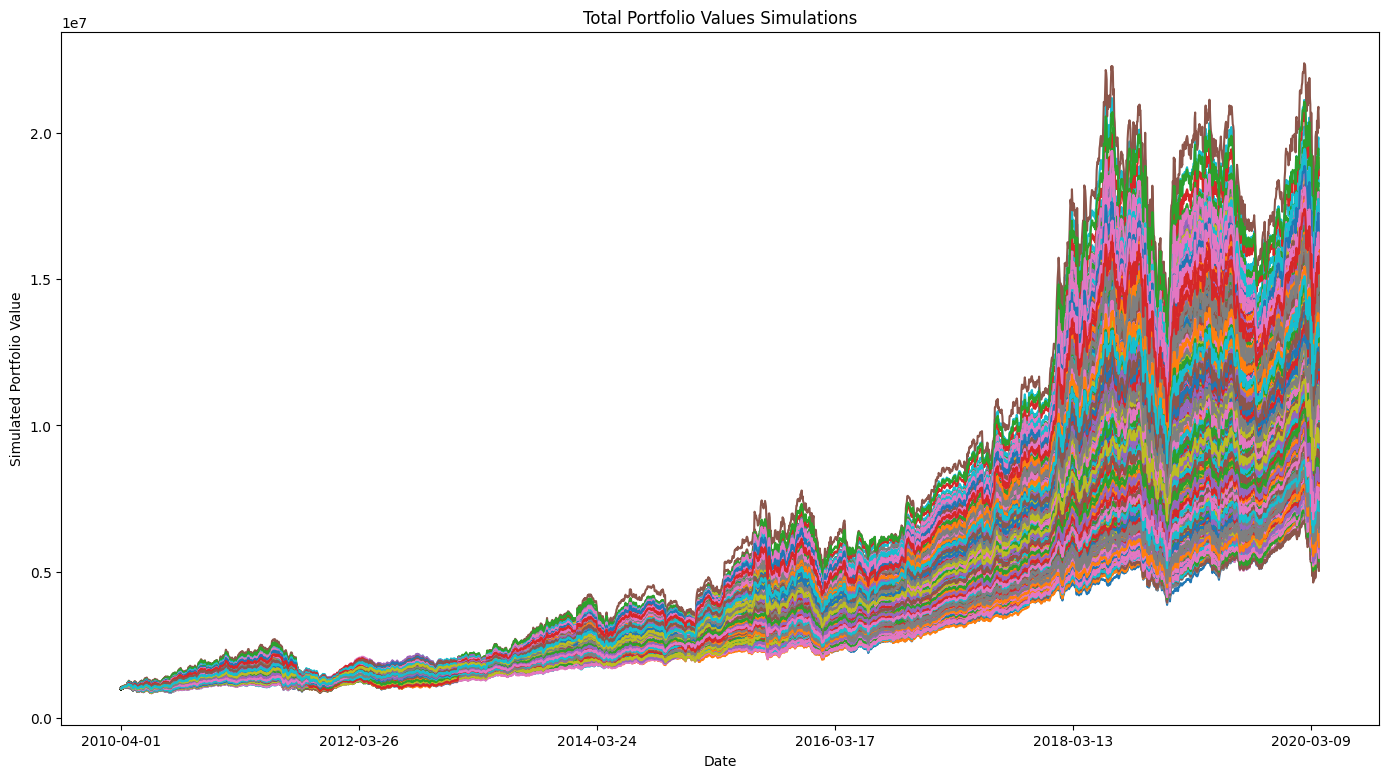

In [126]:
# Plotting Total Portfolio Values Across Simulations
plt.figure(figsize=(17,9))
for i in range(SIMULATIONS):
    for j in range(NUM_ASSETS):
        asset_dfs[j]['Allocation'] = asset_dfs[j]['Normed Return']*weights_arr[i][j]
        asset_dfs[j]['Position Values'] = asset_dfs[j]['Allocation']*INVESTMENT_AMT
    pos_val_cols = [asset_df[['Position Values']] for asset_df in asset_dfs]
    portfolio_val = pd.concat(pos_val_cols, axis=1, sort=True)
    portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
    portfolio_val['Total Pos'].plot()
plt.title('Total Portfolio Values Simulations')
plt.ylabel('Simulated Portfolio Value')
plt.xlabel('Date')
plt.savefig('Total Portfolio Values Simulations.png')
plt.show()

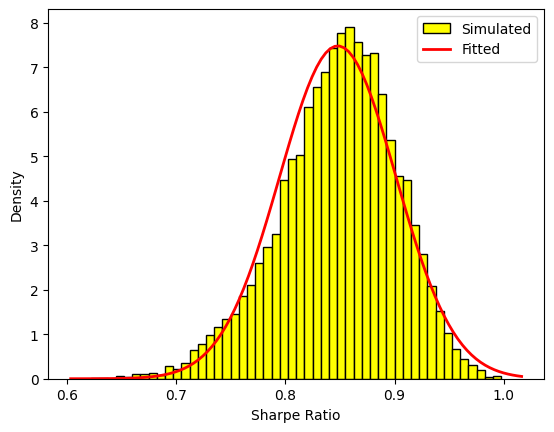

In [127]:
# Creating a histogram and fitting a probability density function to the Sharpe Ratios array
plt.hist(sharpe_arr, bins=50, density=True, color='yellow', edgecolor='black', label='Simulated')

xmin, xmax = plt.xlim() 
mu, std = norm.fit(sharpe_arr)
x = np.linspace(xmin, xmax, 100) 
dist = norm.pdf(x, mu, std) 
  
plt.plot(x, dist, color='red', linewidth=2, label='Fitted') 
plt.xlabel('Sharpe Ratio')
plt.ylabel('Density') 
plt.legend()
plt.show()

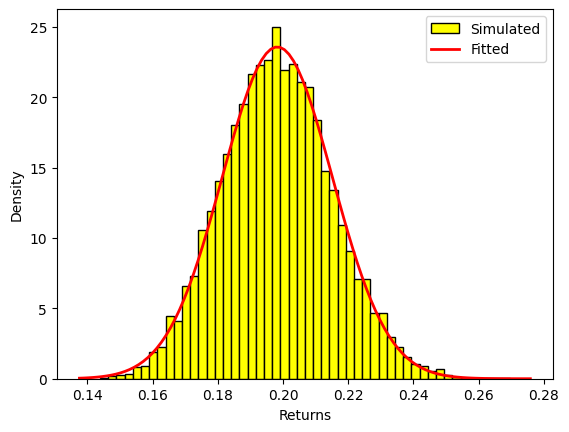

In [128]:
# Creating a histogram and fitting a probability density function to the returns array
plt.hist(ret_arr, bins=50, density=True, color='yellow', edgecolor='black', label='Simulated')

xmin, xmax = plt.xlim() 
mu, std = norm.fit(ret_arr)
x = np.linspace(xmin, xmax, 100) 
dist = norm.pdf(x, mu, std) 
  
plt.plot(x, dist, color='red', linewidth=2, label='Fitted') 
plt.xlabel('Returns')
plt.ylabel('Density') 
plt.legend()
plt.show()

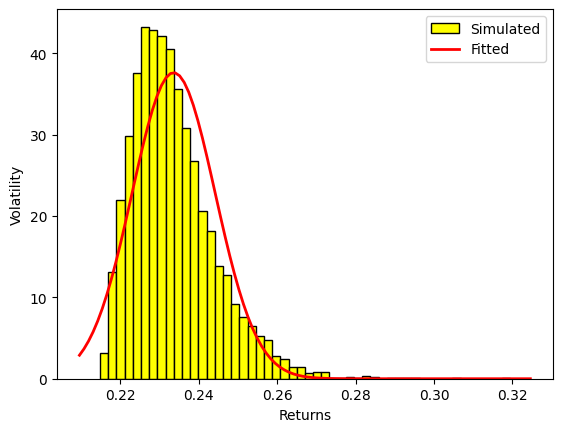

In [129]:
# Creating a histogram and fitting a probability density function to the volatilities array
plt.hist(vol_arr, bins=50, density=True, color='yellow', edgecolor='black', label='Simulated')

xmin, xmax = plt.xlim() 
mu, std = norm.fit(vol_arr)
x = np.linspace(xmin, xmax, 100) 
dist = norm.pdf(x, mu, std) 
  
plt.plot(x, dist, color='red', linewidth=2, label='Fitted') 
plt.xlabel('Returns')
plt.ylabel('Volatility') 
plt.legend()
plt.show()

## Maximum Sharpe Ratio Optimization Method

In [130]:
sharpe_arr.max()

0.9975596205837038

In [131]:
max_sr_idx = sharpe_arr.argmax()
max_sr_idx

8877

In [132]:
weights_arr[max_sr_idx]

array([0.33534652, 0.00074584, 0.21928941, 0.27314687, 0.09684148,
       0.04047456, 0.00842631, 0.02572901])

In [133]:
max_sr_ret = ret_arr[max_sr_idx]
max_sr_vol = vol_arr[max_sr_idx]

## Minimum Volatility/Risk Optimization Method

In [134]:
vol_arr.min()

0.21481393866564125

In [135]:
min_vol_idx = vol_arr.argmin()
min_vol_idx

9937

In [136]:
min_vol_ret = ret_arr[min_vol_idx]
min_vol_vol = vol_arr[min_vol_idx]

## Maximum Return Optimization Method

In [137]:
ret_arr.max()

0.2695788040465871

In [138]:
max_ret_idx = ret_arr.argmax()
max_ret_idx

6465

In [139]:
max_ret_ret = ret_arr[max_ret_idx]
max_ret_vol = vol_arr[max_ret_idx]

In [140]:
# Simulation Averages
avg_ret = ret_arr.mean()
avg_vol = vol_arr.mean()

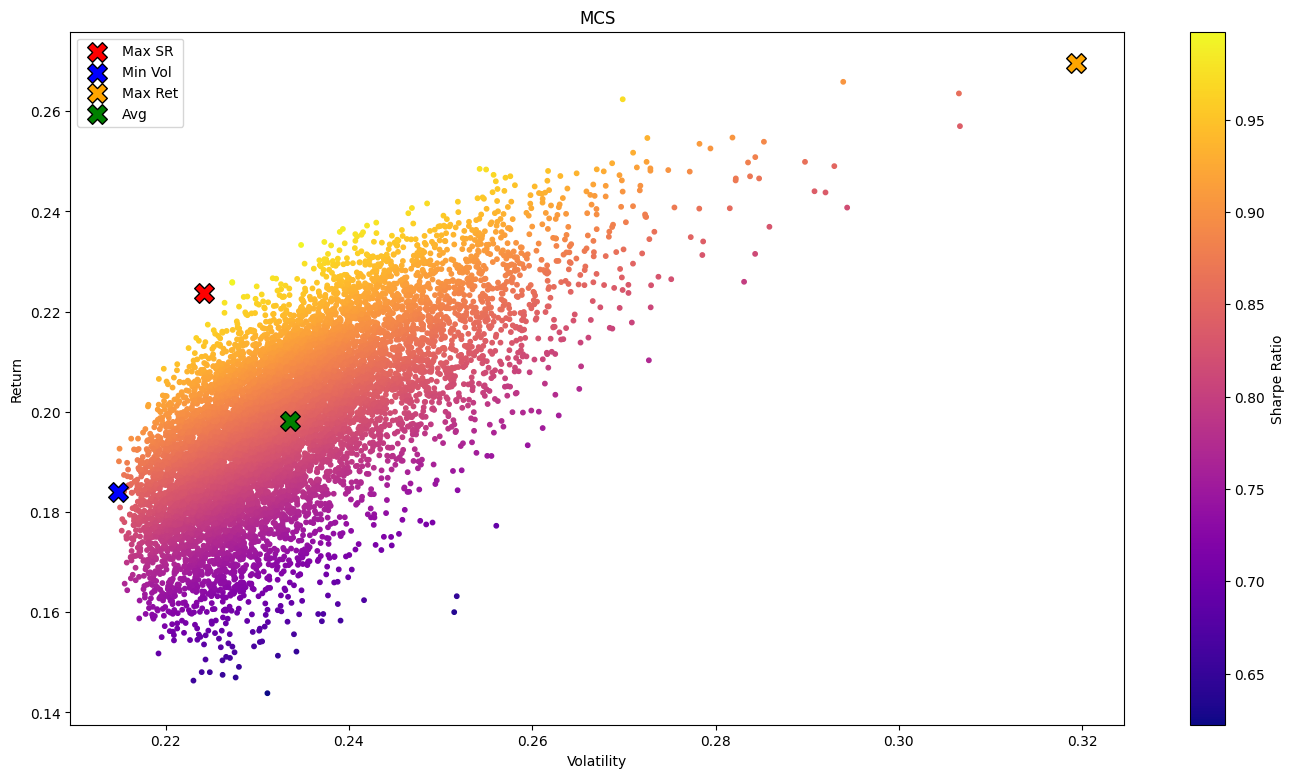

In [141]:
# Plot all the portfolio combinations
plt.figure(figsize=(17,9))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma', s=10)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, marker='X', c='red', s=200, edgecolors='black', label='Max SR')
plt.scatter(min_vol_vol, min_vol_ret, marker='X', c='blue', s=200, edgecolors='black', label='Min Vol')
plt.scatter(max_ret_vol, max_ret_ret, marker='X', c='orange', s=200, edgecolors='black', label='Max Ret')
plt.scatter(avg_vol, avg_ret, marker='X', c='green', s=200, edgecolors='black', label='Avg')
plt.legend()
plt.title('MCS')
plt.savefig('MCS.png')
plt.show()

# Mathematical Optimization Algorithm

Optimal weights can be mathematically determined using optimization functions. By utilizing the built-in optimization algorithm in the SciPy library, we create an optimizer that seeks to minimize the negative Sharpe Ratio, effectively maximizing the Sharpe Ratio, thus helping in calculating the optimal allocation of weights for our portfolio.

In [142]:
def neg_sharpe(weights):
    return compute_ret_vol_sr(weights)[2] * -1

In [143]:
# Returns 0 if sum of weights is 1
def check_sum(weights):
    return np.sum(weights) - 1

In [144]:
bounds = [(0, 1)] * NUM_ASSETS   # Bounds such that actual weights of each stock should range between 0 to 1
initial_guess = [allocation]*NUM_ASSETS
cons = ({'type':'eq','fun': check_sum})

In [145]:
opt_results = minimize(neg_sharpe, initial_guess, method='SLSQP', bounds=bounds, constraints=cons)
opt_results

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -1.0314830757146503
       x: [ 3.101e-01  0.000e+00  3.272e-01  2.132e-01  1.495e-01
            0.000e+00  0.000e+00  6.527e-17]
     nit: 7
     jac: [-9.239e-07  7.075e-02 -3.427e-07  3.308e-06 -2.027e-06
            2.611e-01  1.674e-01  1.922e-01]
    nfev: 63
    njev: 7

In [146]:
# Optimal Weights
opt_results.x

array([3.10099029e-01, 0.00000000e+00, 3.27235337e-01, 2.13198427e-01,
       1.49467208e-01, 0.00000000e+00, 0.00000000e+00, 6.52689708e-17])

In [147]:
print("Maximum Sharpe Ratio: ", compute_ret_vol_sr(opt_results.x)[2])

Maximum Sharpe Ratio:  1.0314830757146503


# Efficient Frontier

The efficient frontier comprises optimal portfolios that provide the maximum expected return for a specified level of risk or the minimum risk for a given expected return. Portfolios below the efficient frontier are suboptimal, offering insufficient return for the associated risk. Similarly, portfolios to the right of the efficient frontier are suboptimal as they entail higher risk for a given rate of return.

In [148]:
# Creating a linspace number of points to calculate x on
eff_frontier = np.linspace(0, 0.3, 100)

In [149]:
def volatility(weights):
    return compute_ret_vol_sr(weights)[1]

In [150]:
frontier_volatility = []

for possible_return in eff_frontier:
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda weights: compute_ret_vol_sr(weights)[0] - possible_return})
    
    result = minimize(volatility, initial_guess, method='SLSQP', bounds=bounds, constraints=cons)
    frontier_volatility.append(result['fun'])

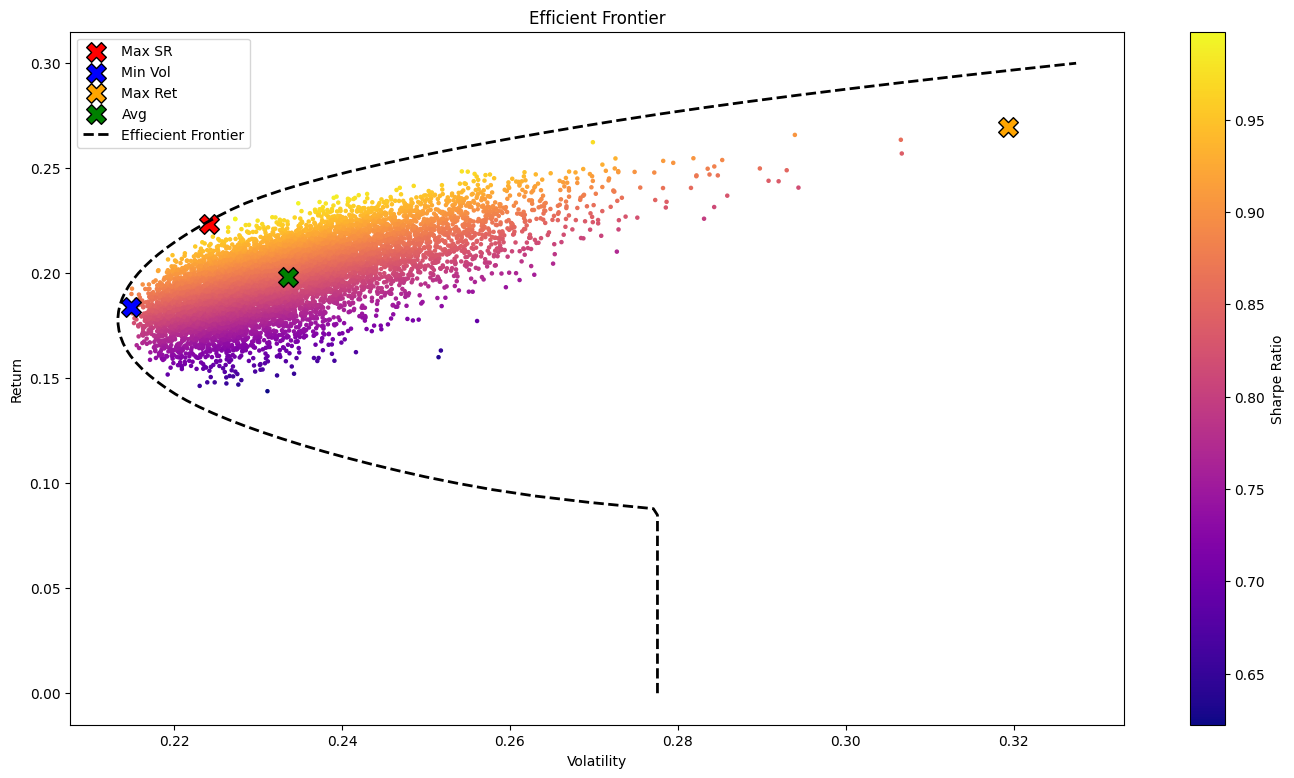

In [151]:
# Plot all the portfolio combinations and efficient frontier
plt.figure(figsize=(17, 9))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='plasma', s=5)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret, marker='X', c='red', s=200, edgecolors='black', label='Max SR')
plt.scatter(min_vol_vol, min_vol_ret, marker='X', c='blue', s=200, edgecolors='black', label='Min Vol')
plt.scatter(max_ret_vol, max_ret_ret, marker='X', c='orange', s=200, edgecolors='black', label='Max Ret')
plt.scatter(avg_vol, avg_ret, marker='X', c='green', s=200, edgecolors='black', label='Avg')
plt.plot(frontier_volatility, eff_frontier, 'k--', linewidth=2, label='Effiecient Frontier')
plt.legend()
plt.title('Efficient Frontier')
plt.savefig('MCS_EF.png')
plt.show()